In [4]:
import numpy as np
import numpy.random as rnd
from scipy import random
import matplotlib.pyplot as plt


def energy_ising_1d(configuration,J,h):
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        ip1 = (i+1)%num_spins
        spinip1 = configuration[ip1]
        
        energy += - J * (spini * spinip1) - h*spini
        
    return energy
        

In [5]:
random_seed = 1
np.random.seed(random_seed)

def metropolis_mc_slow(n_steps, n_lattice_sites, beta, J, h, debug=False,save_freq=10):
    configuration = 2*np.random.randint(2, size=n_lattice_sites) - 1
    average_spins = []
    
    if debug is True: 
        print("Starting configuration:",configuration)
    
    current_energy = energy_ising_1d(configuration,J,h)
    for i in range(n_steps):
        
        spin_to_change = np.random.randint(n_lattice_sites)
        # Change configuration[spin_to_change] to it's opposite value (1->-1, -1->1). 
        # There is a very simple mathematical operation that does this, regarless of it's current value
        configuration[spin_to_change] *= -1
        
        energy_flip = energy_ising_1d(configuration,J,h)
        
        r = np.random.random()
        if r<min(1,np.exp(-beta*(energy_flip-current_energy))):
            current_energy = energy_flip
        else:
            configuration[spin_to_change] *= -1
        
        average_spin = configuration.mean()
        
        if i%save_freq == 0:
            average_spins.append(average_spin)    

        if debug and i%10==0: 
            print("%i: "%i,configuration,"Energy:",current_energy,"Spin:",average_spin)
    
    return average_spins

##########
def metropolis_mc_energy(n_steps, n_lattice_sites, beta, J, h, debug=False,save_freq=10):
    configuration = 2*np.random.randint(2, size=n_lattice_sites) - 1
    current_energys = []
    
    if debug is True: 
        print("Starting configuration:",configuration)
    
    current_energy = energy_ising_1d(configuration,J,h)
    for i in range(n_steps):
        
        spin_to_change = np.random.randint(n_lattice_sites)
        # Change configuration[spin_to_change] to it's opposite value (1->-1, -1->1). 
        # There is a very simple mathematical operation that does this, regarless of it's current value
        configuration[spin_to_change] *= -1
        
        energy_flip = energy_ising_1d(configuration,J,h)
        
        r = np.random.random()
        if r<min(1,np.exp(-beta*(energy_flip-current_energy))):
            current_energy = energy_flip
        else:
            configuration[spin_to_change] *= -1
        
        average_spin = configuration.mean()
        
        if i%save_freq == 0:
            current_energys.append(current_energy)    

        if debug and i%10==0: 
            print("%i: "%i,configuration,"Energy:",current_energy,"Spin:",average_spin)
    
    return current_energys
##########


#high temperature
print("High temperature:")
average_spins = metropolis_mc_slow(n_steps=100, n_lattice_sites=10, beta=0.1, J=1, h=0, debug=True)
print("-------------------------------------------------------------------------------------")

#low temperature
print("Low temperature:")
average_spins = metropolis_mc_slow(n_steps=100, n_lattice_sites=10, beta=1, J=1, h=0, debug=True)


High temperature:
Starting configuration: [ 1  1 -1 -1  1  1  1  1  1 -1]
0:  [-1  1 -1 -1  1  1  1  1  1 -1] Energy: -2.0 Spin: 0.2
10:  [-1  1 -1 -1 -1  1 -1 -1  1  1] Energy: 2.0 Spin: -0.2
20:  [ 1 -1 -1  1  1 -1 -1  1 -1 -1] Energy: 2.0 Spin: -0.2
30:  [-1 -1 -1 -1  1  1  1  1 -1 -1] Energy: -6.0 Spin: -0.2
40:  [ 1 -1 -1  1  1  1  1  1  1 -1] Energy: -2.0 Spin: 0.4
50:  [ 1  1 -1 -1 -1  1 -1 -1  1  1] Energy: -2.0 Spin: 0.0
60:  [ 1 -1  1 -1  1  1 -1  1 -1  1] Energy: 6.0 Spin: 0.2
70:  [ 1  1 -1  1 -1 -1  1 -1  1  1] Energy: 2.0 Spin: 0.2
80:  [-1 -1  1 -1 -1 -1  1  1 -1  1] Energy: 2.0 Spin: -0.2
90:  [ 1 -1  1  1 -1 -1 -1  1  1  1] Energy: -2.0 Spin: 0.2
-------------------------------------------------------------------------------------
Low temperature:
Starting configuration: [-1 -1  1 -1 -1 -1  1 -1  1  1]
0:  [ 1 -1  1 -1 -1 -1  1 -1  1  1] Energy: 2.0 Spin: 0.0
10:  [-1 -1 -1  1 -1 -1 -1  1  1  1] Energy: -2.0 Spin: -0.2
20:  [ 1  1 -1  1  1 -1 -1 -1 -1  1] Energy: -2.0 

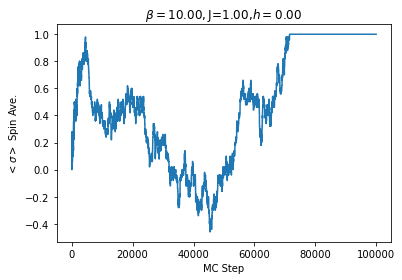

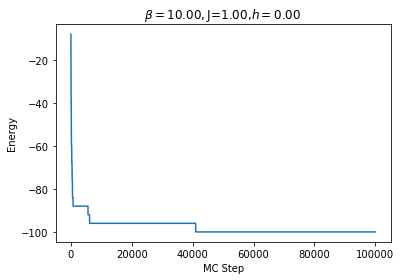

In [9]:
test_n_lattice_sites = 100
test_beta = 10
test_J = 1
test_h = 0


test_n_steps = 100000


average_spins = metropolis_mc_slow(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h,save_freq=1)
plt.plot(average_spins)
plt.ylabel("$<\sigma> $ Spin Ave.")
plt.xlabel("MC Step")
plt.title("$\\beta=%.2f,$J=%.2f,$h=%.2f$"%(test_beta,test_J,test_h))
plt.show()



current_energys = metropolis_mc_energy(test_n_steps, test_n_lattice_sites, test_beta, test_J,test_h,save_freq=1)
plt.plot(current_energys)
plt.ylabel("Energy")
plt.xlabel("MC Step")
plt.title("$\\beta=%.2f,$J=%.2f,$h=%.2f$"%(test_beta,test_J,test_h))
plt.show()